In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
d1=pd.read_csv('LoansData (1).csv')

In [5]:
d1.shape

(2500, 15)

In [6]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [7]:
d1.columns = [i.replace('.', '_') for i in d1.columns]


In [8]:
d1.head()


,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [9]:
d1['Interest_Rate'] = d1['Interest_Rate'].str.replace('%', '').astype('float')

In [10]:
d1['Debt_To_Income_Ratio']=d1['Debt_To_Income_Ratio'].str.replace('%', '').astype('float')

In [11]:
d1['Loan_Length']=d1['Loan_Length'].str.replace('months', '').astype('float')

In [12]:
d1['Employment_Length'] = d1['Employment_Length'].str.replace('years','').str.replace('year','').str.replace('<','').str.replace('+','').astype('float')

In [13]:
d1['FICO_Range'] = d1['FICO_Range'].str.split('-', expand=True)[0].astype('float')

In [14]:
d1.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695.0,11.0,14469.0,0.0,9.0


In [15]:
d1.duplicated

<bound method DataFrame.duplicated of       LoanID  Amount_Requested  Amount_Funded_By_Investors  Interest_Rate  \
0          1           20000.0                    20000.00           8.90   
1          2           19200.0                    19200.00          12.12   
2          3           35000.0                    35000.00          21.98   
3          4           10000.0                     9975.00           9.99   
4          5           12000.0                    12000.00          11.71   
...      ...               ...                         ...            ...   
2495    2496           30000.0                    29950.00          16.77   
2496    2497           16000.0                    16000.00          14.09   
2497    2498           10000.0                    10000.00          13.99   
2498    2499            6000.0                     6000.00          12.42   
2499    2500            9000.0                     5242.75          13.79   

      Loan_Length        Loan_Purpose

In [16]:
d1.duplicated().sum()

np.int64(0)

In [17]:
categorical = [var for var in d1.columns if d1[var].dtype == 'O']
cat_d1=d1[categorical]
cat_d1

,Loan_Purpose,State,Home_Ownership
0,debt_consolidation,SC,MORTGAGE
1,debt_consolidation,TX,MORTGAGE
2,debt_consolidation,CA,MORTGAGE
3,debt_consolidation,KS,MORTGAGE
4,credit_card,NJ,RENT
...,...,...,...
2495,debt_consolidation,NY,MORTGAGE
2496,home_improvement,MD,OWN
2497,debt_consolidation,PA,MORTGAGE
2498,major_purchase,NJ,RENT


In [18]:
numerical = [var for var in d1.columns if d1[var].dtype != 'O']
num_d1= d1[numerical]
num_d1

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.00,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.00,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.00,21.98,60.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.00,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.00,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,60.0,19.23,9250.00,705.0,15.0,45880.0,1.0,8.0
2496,2497,16000.0,16000.00,14.09,60.0,21.54,8903.25,740.0,18.0,18898.0,1.0,10.0
2497,2498,10000.0,10000.00,13.99,36.0,4.89,2166.67,680.0,4.0,4544.0,0.0,10.0
2498,2499,6000.0,6000.00,12.42,36.0,16.66,3500.00,675.0,8.0,7753.0,0.0,5.0


In [19]:
num_d1.shape

(2500, 12)

In [20]:
cat_d1.shape

(2500, 3)

In [21]:
cat_d1['LoanID']=d1['LoanID']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19572\3963372861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_d1['LoanID']=d1['LoanID']


# Num data - Missing value treatment on numerrical data 

In [22]:
num_fill = num_d1.fillna(num_d1.median(numeric_only=True))
num_fill

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.00,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.00,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.00,21.98,60.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.00,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.00,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,60.0,19.23,9250.00,705.0,15.0,45880.0,1.0,8.0
2496,2497,16000.0,16000.00,14.09,60.0,21.54,8903.25,740.0,18.0,18898.0,1.0,10.0
2497,2498,10000.0,10000.00,13.99,36.0,4.89,2166.67,680.0,4.0,4544.0,0.0,10.0
2498,2499,6000.0,6000.00,12.42,36.0,16.66,3500.00,675.0,8.0,7753.0,0.0,5.0


In [23]:
num_fill.isna().sum()

LoanID                            0
Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Debt_To_Income_Ratio              0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

In [25]:
num_fill.describe()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1250.50000,12404.500000,12001.573236,13.065424,41.260800,15.380396,5688.655748,705.900000,10.071600,15218.054400,0.905600,5.476800
std,721.83216,7801.520636,7745.320754,4.175530,9.930893,7.503551,3962.349122,35.028571,4.504863,18270.638709,1.230811,3.389581
min,1.00000,1000.000000,-0.010000,5.420000,36.000000,0.000000,588.500000,640.000000,2.000000,0.000000,0.000000,1.000000
25%,625.75000,6000.000000,6000.000000,10.160000,36.000000,9.750000,3500.000000,680.000000,7.000000,5589.250000,0.000000,2.000000
50%,1250.50000,10000.000000,10000.000000,13.110000,36.000000,15.320000,5000.000000,700.000000,9.000000,10948.000000,0.000000,5.000000
75%,1875.25000,17000.000000,16000.000000,15.800000,36.000000,20.672500,6800.000000,725.000000,13.000000,18843.750000,1.000000,10.000000
max,2500.00000,35000.000000,35000.000000,24.890000,60.000000,34.910000,102750.000000,830.000000,38.000000,270800.000000,9.000000,10.000000


# Num data - graphs

In [26]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

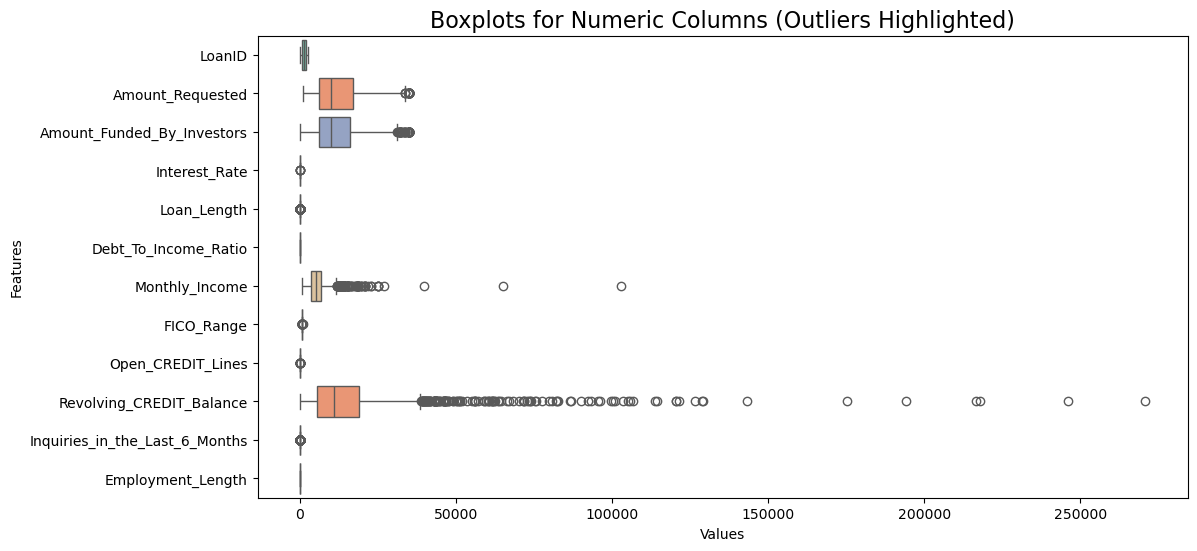

In [27]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=num_d1, orient="h", palette="Set2")
 
# Add title and labels

plt.title("Boxplots for Numeric Columns (Outliers Highlighted)", fontsize=16)

plt.xlabel("Values")

plt.ylabel("Features")

plt.show()
 

# Num data - Outlier treatment 

In [28]:
li = ['Amount_Requested','Interest_Rate','Loan_Length','FICO_Range','Open_CREDIT_Lines','Inquiries_in_the_Last_6_Months']

num_d1_copy = num_d1.copy()

for i in num_d1_copy:

    if i in li:

        lc, uc = outliertreat_IQR(num_d1_copy[i])

        num_d1_copy[i] = num_d1_copy[i].clip(lc, uc)

num_d1_copy

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.00,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.00,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,33500.0,35000.00,21.98,36.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.00,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.00,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,36.0,19.23,9250.00,705.0,15.0,45880.0,1.0,8.0
2496,2497,16000.0,16000.00,14.09,36.0,21.54,8903.25,740.0,18.0,18898.0,1.0,10.0
2497,2498,10000.0,10000.00,13.99,36.0,4.89,2166.67,680.0,4.0,4544.0,0.0,10.0
2498,2499,6000.0,6000.00,12.42,36.0,16.66,3500.00,675.0,8.0,7753.0,0.0,5.0


# Catagorical data 

In [29]:
cat_d1

,Loan_Purpose,State,Home_Ownership,LoanID
0,debt_consolidation,SC,MORTGAGE,1
1,debt_consolidation,TX,MORTGAGE,2
2,debt_consolidation,CA,MORTGAGE,3
3,debt_consolidation,KS,MORTGAGE,4
4,credit_card,NJ,RENT,5
...,...,...,...,...
2495,debt_consolidation,NY,MORTGAGE,2496
2496,home_improvement,MD,OWN,2497
2497,debt_consolidation,PA,MORTGAGE,2498
2498,major_purchase,NJ,RENT,2499


# Catagorical data - Checking the values


<Axes: xlabel='Loan_Purpose'>

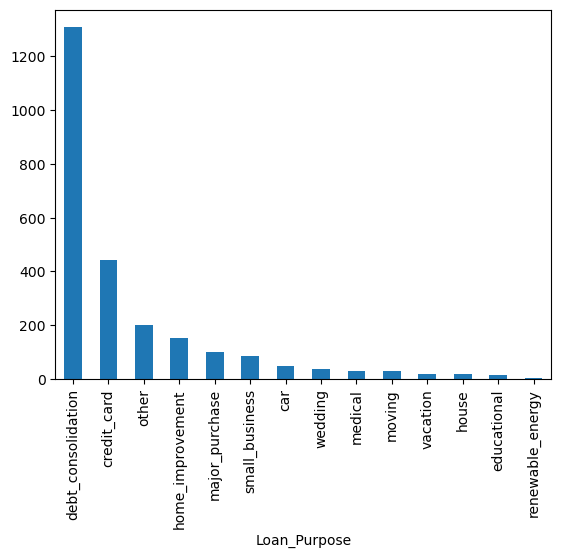

In [30]:

cat_d1.Loan_Purpose.value_counts().plot(kind="bar")


<Axes: xlabel='State'>

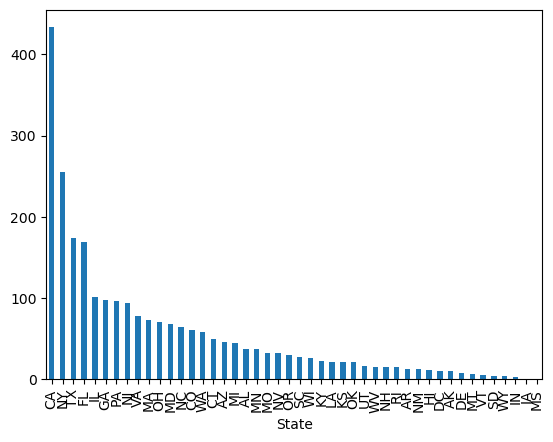

In [31]:
cat_d1.State.value_counts().plot(kind="bar")


<Axes: xlabel='LoanID'>

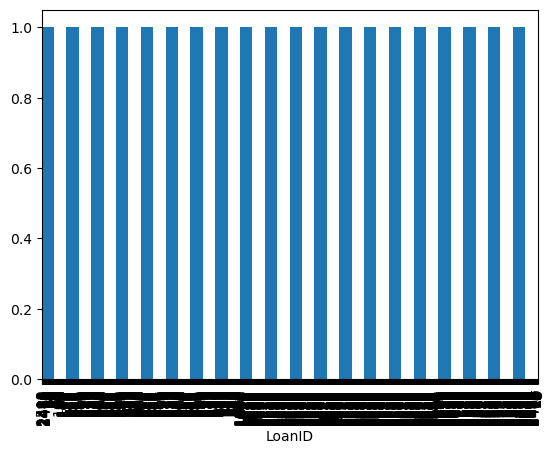

In [32]:
cat_d1.LoanID.value_counts().plot(kind="bar")


# Catagorical data - Missing value treatment 

In [35]:

#Missing value treatment 

d1['Loan_Purpose'].value_counts()

Loan_Purpose
debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: count, dtype: int64

In [36]:
d1['State'].value_counts()

State
CA    433
NY    255
TX    174
FL    169
IL    101
GA     98
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
AL     38
MN     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
KS     21
OK     21
UT     16
WV     15
NH     15
RI     15
AR     13
NM     13
HI     12
DC     11
AK     11
DE      8
MT      7
VT      5
SD      4
WY      4
IN      3
IA      1
MS      1
Name: count, dtype: int64

In [37]:
d1['Home_Ownership'].value_counts()

Home_Ownership
MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: count, dtype: int64

In [38]:
cat_d1[cat_d1['Home_Ownership'].isnull()]


,Loan_Purpose,State,Home_Ownership,LoanID
2492,debt_consolidation,NJ,NaN,2493


In [42]:
cat_d1 = cat_d1.drop(index=2492)
cat_d1 = cat_d1.reset_index()

In [43]:
cat_d1 = cat_d1.drop(columns='index')

In [44]:
cat_d1.shape

(2499, 4)

# Catagorical data-One hot data encoding decoding 


In [45]:
cat_d1_copy=cat_d1.copy()
cat_d1_copy.drop(columns='State')
pd.get_dummies(cat_d1_copy, columns=['Loan_Purpose', 'Home_Ownership'], dtype=int)

,State,LoanID,Loan_Purpose_car,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_educational,Loan_Purpose_home_improvement,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_medical,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,SC,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,TX,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,CA,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,KS,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,NJ,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,NY,2496,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2495,MD,2497,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2496,PA,2498,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2497,NJ,2499,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
cat_d1_copy = cat_d1_copy.drop(columns='State')

In [49]:
cat_d1_updated = pd.get_dummies(cat_d1_copy, columns=['Loan_Purpose', 'Home_Ownership'], dtype=int)

In [50]:
cat_d1_updated.head()

,LoanID,Loan_Purpose_car,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_educational,Loan_Purpose_home_improvement,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_medical,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Mergeing both datas 

In [51]:
merge_data = pd.merge(
    num_d1_copy,
    cat_d1_updated,
    how='inner',
    left_on='LoanID', right_on='LoanID'   
)



merge_data.shape

(2499, 31)